In [585]:
import numpy as np
from matplotlib import pylab as plt

## Parte I:

1. Para cada una de las siguientes funciones, calcula (a mano) el vector gradiente, todos los puntos críticos y el mínimo global.

   - **f(x, y) = x^2 + y^2**
   
   - **g(x, y) = x^2 - y^2**
   
   - **h(x, y) = x^4 - x^3 - 2x^2 + |y|**

In [586]:
def fun1(x,y):
   return x**2 + y**2

def gradien_vector_fun1(x:float,y:float)-> tuple:
   df_dx = 2*x
   df_dy = 2*y
   return [df_dx, df_dy]

### Mínimos globales y locales

Primero igualamos el gradiente a cero para obtener los puntos críticos, la función no se indefine así que no contamos esos puntos críticos:      
                   
             (2x,2y)=(0,0) 

Luego x,y = (0,0) es el único punto crítico de la función

Luego,como x^2 + y^2 >= 0, conluímos que (0,0) es un mínimo global , tambien podemos conluir esto si observamos la gráfica de la función

In [587]:
def fun2(x,y):
   return x**2 - y**2

def gradien_vector_fun2(x:float,y:float)-> tuple:
   df_dx = 2*x
   df_dy = -2*y
   return (df_dx, df_dy)

### Mínimos globales y locales
Para encontrar los puntos críticos analizemos la siguiente ecuación (o los puntos en que la el gradiente no esta definido);
             (2x,-2y)=(0,0) 

Luego x,y = (0,0) es el único punto crítico de la función

Analisís del punto crítico:
Este es un punto silla (no alcancé a escribir el desarrollo t-t), pero cuando vemos la función (que es como una silla de montar de caballo) es fácil notar esto



In [588]:
def fun3(x,y):
    return x**4 - x**3 - 2*x**2 + abs(y)

def gradien_vector_fun3(x,y):
    df_dx = 4*x**3 - 3*(x**2) - 4*(x)
    
    if y>=0:
        df_dy = 1 
    
    else:
        df_dy = -1
    return (df_dx, df_dy)


### Mínimos globales y locales

Para encontrar mínimos locales analizemos la siguiente ecuación (o los puntos en que la el gradiente no esta definido);
      (4x^2-3x^2 - 4x,abs(y))=(0,0) 

Esto cumple en los puntos; ( no terminado t-t)
(0,0)

   




## Parte II: Graficar las funciones y sus curvas de nivel

    
    2. Dibujen la gráfica de cada función.

    3. Dibujen (en otra figura) varias curvas de nivel para cada función.

    4. Dibujen todos los puntos críticos que calcularon para cada función como un marker en la figura anterior

In [589]:

def cargar_grafico(funcion): # copiado de ejemplo
    
    X, Y = np.meshgrid(np.linspace(-1,2,100),np.linspace(-1,2,100))
    Z = funcion(X, Y)

    ax = plt.figure().add_subplot(projection='3d')

    ax.plot_surface(X, Y, Z)

    ax.set_xlabel("x")
    ax.set_ylabel("y")

    plt.show()

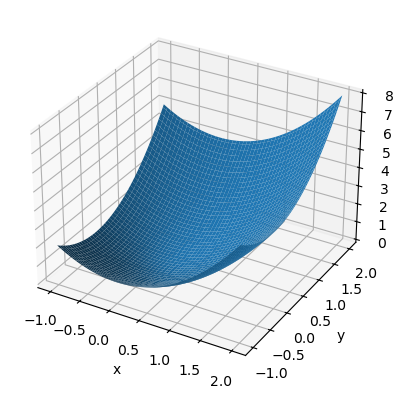

In [590]:
cargar_grafico(fun1)

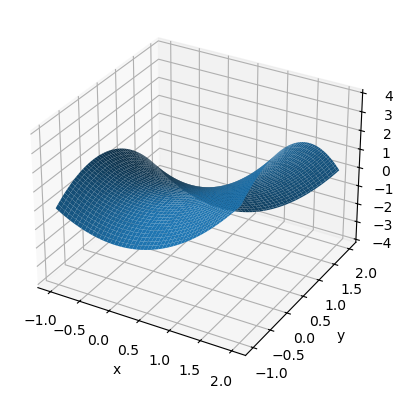

In [591]:
cargar_grafico(fun2)

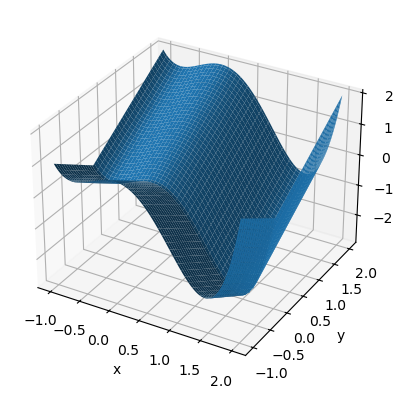

In [592]:
cargar_grafico(fun3)

In [593]:
# función generada por chatgpt
def plot_contour(function, x_range=(-2, 2), y_range=(-2, 2), num_points=100, levels=10, approx_points=None):
    """
    Plots contour lines of a given function and optional points.

    Args:
    function (function): The function to plot contours for.
    x_range (tuple): Range of x values (default=(-1, 1)).
    y_range (tuple): Range of y values (default=(-1, 1)).
    num_points (int): Number of points along each axis (default=100).
    levels (int): Number of contour levels to plot (default=10).
    approx_points (array): Array of points to plot on the contour (optional).
    """
    # Create a grid of points
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    y_values = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x_values, y_values)

    # Compute function values at each point of the grid
    Z = function(X, Y)

    # Plot contour lines
    plt.figure(figsize=(8, 6))
    contour = plt.contour(X, Y, Z, levels=levels)
    plt.clabel(contour, inline=True, fontsize=8)
    
    # Plot gradient descent points if provided
    if approx_points is not None:
        plt.scatter(approx_points[:, 0], approx_points[:, 1], s=12, c=np.arange(approx_points.shape[0]), cmap='inferno')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contour Plot of the Function')
    plt.grid(True)
    plt.show()

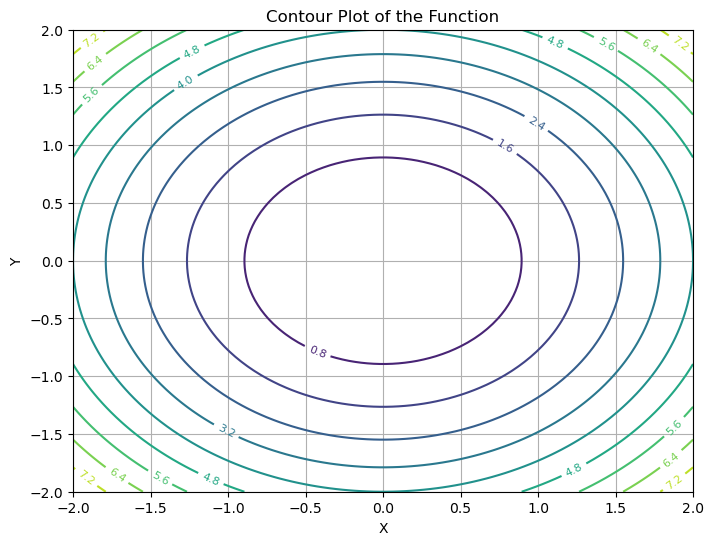

In [594]:
plot_contour(fun1)

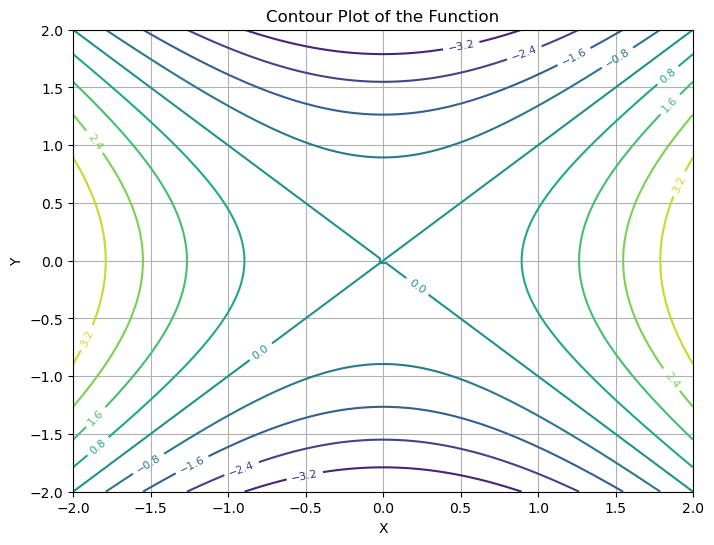

In [595]:
plot_contour(fun2)

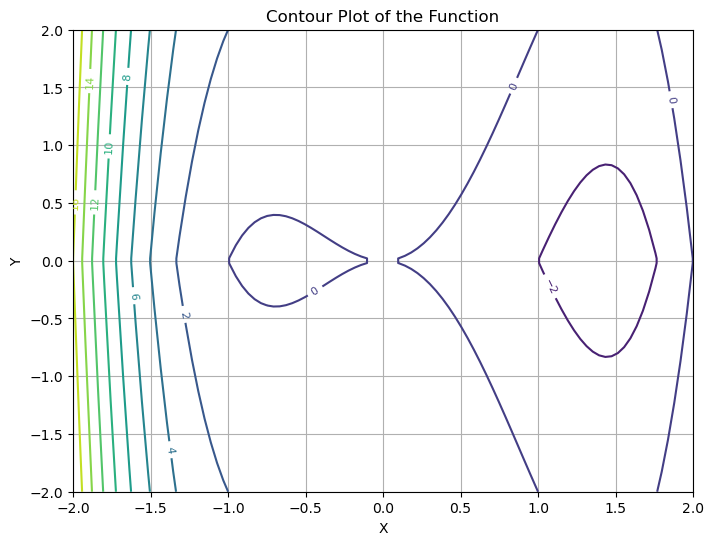

In [596]:
plot_contour(fun3)

## Parte III: 

     5) Implementen el algoritmo de descenso de gradiente.


     6) Ejecuten el algoritmo para los casos siguientes:
        a) f(x,y); γ = 0,01; a0 = (2; −1)
        b) f(x,y); γ = 1; a0 = (2; −1)
        c) f(x,y); γ = 1,01; a0 = (2; −1)
        d) g(x,y); γ = 0,01; a0 = (1; 0)
        e) g(x,y); γ = 0,01; a0 = (1; 0,01)
        f) h(x,y); γ = 0,1; a0 = (−0,01; 0,5)


In [597]:
# se basa en el ejemplo
def decent_gradient(taza_aprendizaje:float, valores_inicio: np.array ,
                     vector_gradiente,  num_iter= 10000) -> list:
    '''
    Calcula una secuencia que puede converger al mínimo local de la función 
    correspondiente al vector gradiente 
    '''
    
    approx = [valores_inicio]

    for i in range(num_iter):
        valor_actual = approx[-1]
        valor_siguiente = approx[-1] - (taza_aprendizaje * np.array(vector_gradiente(valor_actual[0],valor_actual[1])))
        approx.append(valor_siguiente)
     
    approx = np.array(approx)
    return approx 

In [598]:
valores_inicio = np.array([2, -1])
points_1=decent_gradient(0.01, valores_inicio , gradien_vector_fun1,100000 )

points_1

array([[ 2.0000e+000, -1.0000e+000],
       [ 1.9600e+000, -9.8000e-001],
       [ 1.9208e+000, -9.6040e-001],
       ...,
       [ 1.1858e-322, -1.1858e-322],
       [ 1.1858e-322, -1.1858e-322],
       [ 1.1858e-322, -1.1858e-322]])

In [599]:
points_2= decent_gradient(taza_aprendizaje = , valores_inicio = np.array([2, -1]),
                 vector_gradiente= gradien_vector_fun1,num_iter = 100000 )

points_2

SyntaxError: invalid syntax (362923484.py, line 1)

In [ ]:

points_3= decent_gradient(taza_aprendizaje = 1.01, valores_inicio = np.array([2, -1]),
                 vector_gradiente= gradien_vector_fun1,num_iter = 35000 )
points_3

array([[ 2.00000000e+000, -1.00000000e+000],
       [-2.04000000e+000,  1.02000000e+000],
       [ 2.08080000e+000, -1.04040000e+000],
       ...,
       [ 1.94913230e+301, -9.74566152e+300],
       [-1.98811495e+301,  9.94057475e+300],
       [ 2.02787725e+301, -1.01393862e+301]])

In [ ]:


points_4= decent_gradient(taza_aprendizaje = 0.01, valores_inicio = np.array([1,0]),
                 vector_gradiente= gradien_vector_fun2, num_iter = 100000 )

points_4

array([[1.000e+000, 0.000e+000],
       [9.800e-001, 0.000e+000],
       [9.604e-001, 0.000e+000],
       ...,
       [1.186e-322, 0.000e+000],
       [1.186e-322, 0.000e+000],
       [1.186e-322, 0.000e+000]])

In [ ]:
points_5 = decent_gradient(taza_aprendizaje = 0.01, valores_inicio = np.array([1,0.01]),
                 vector_gradiente= gradien_vector_fun2,num_iter = 100 )

points_5

array([[1.        , 0.01      ],
       [0.98      , 0.0102    ],
       [0.9604    , 0.010404  ],
       [0.941192  , 0.01061208],
       [0.92236816, 0.01082432],
       [0.9039208 , 0.01104081],
       [0.88584238, 0.01126162],
       [0.86812553, 0.01148686],
       [0.85076302, 0.01171659],
       [0.83374776, 0.01195093],
       [0.81707281, 0.01218994],
       [0.80073135, 0.01243374],
       [0.78471672, 0.01268242],
       [0.76902239, 0.01293607],
       [0.75364194, 0.01319479],
       [0.7385691 , 0.01345868],
       [0.72379772, 0.01372786],
       [0.70932177, 0.01400241],
       [0.69513533, 0.01428246],
       [0.68123262, 0.01456811],
       [0.66760797, 0.01485947],
       [0.65425581, 0.01515666],
       [0.6411707 , 0.0154598 ],
       [0.62834728, 0.01576899],
       [0.61578034, 0.01608437],
       [0.60346473, 0.01640606],
       [0.59139544, 0.01673418],
       [0.57956753, 0.01706886],
       [0.56797618, 0.01741024],
       [0.55661665, 0.01775845],
       [0.

In [ ]:
points_6 = decent_gradient(taza_aprendizaje = 0.1, valores_inicio = np.array([-0.01, (0.5)]),
                 vector_gradiente= gradien_vector_fun3, num_iter = 100000)

points_6

array([[-1.00000000e-02,  5.00000000e-01],
       [-1.39696000e-02,  4.00000000e-01],
       [-1.94978046e-02,  3.00000000e-01],
       ...,
       [-6.93000468e-01, -1.00000000e-01],
       [-6.93000468e-01,  2.77555756e-17],
       [-6.93000468e-01, -1.00000000e-01]])

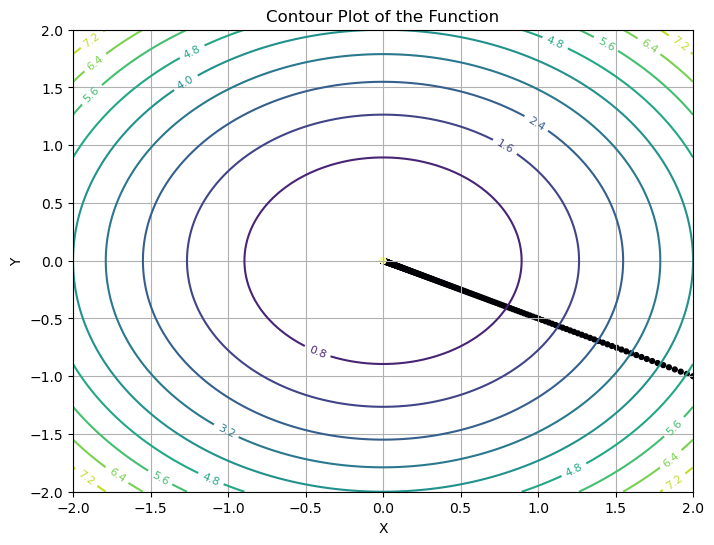

In [ ]:
plot_contour(fun1, x_range=(-2, 2), y_range=(-2, 2), num_points=100, levels=10, approx_points=points_1)


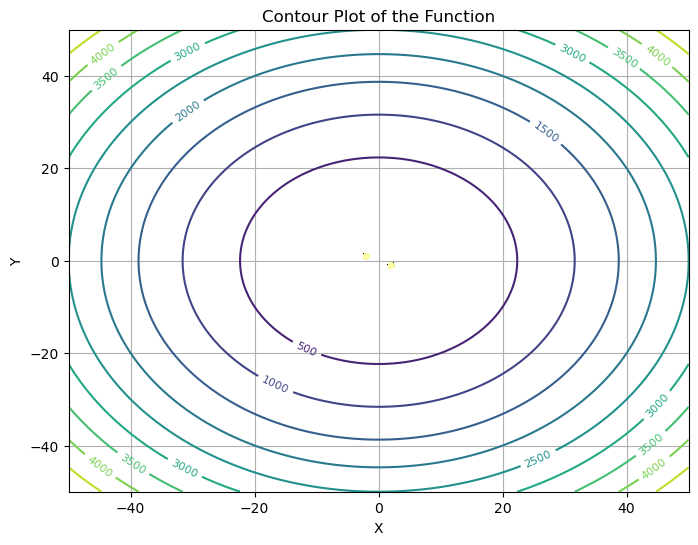

In [ ]:
plot_contour(fun1, x_range=(-50, 50), y_range=(-50, 50), num_points=100, levels=10, approx_points=points_2)


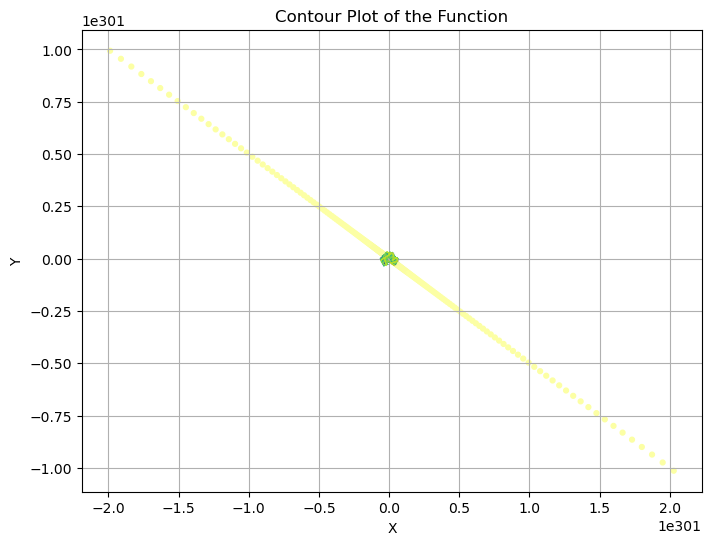

In [ ]:
plot_contour(function=fun1, x_range=(-2, 2), y_range=(-2, 2), num_points=500, levels=10, approx_points=points_3)


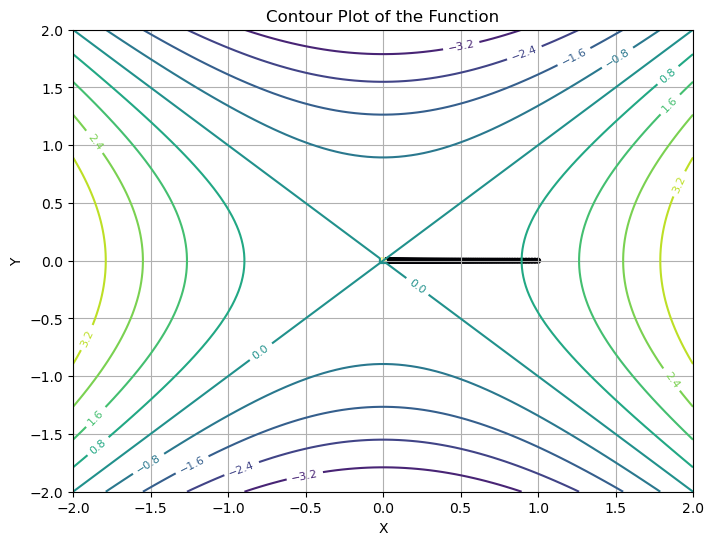

In [ ]:
plot_contour(fun2, x_range=(-2, 2), y_range=(-2, 2), num_points=100, levels=10, approx_points=points_4)


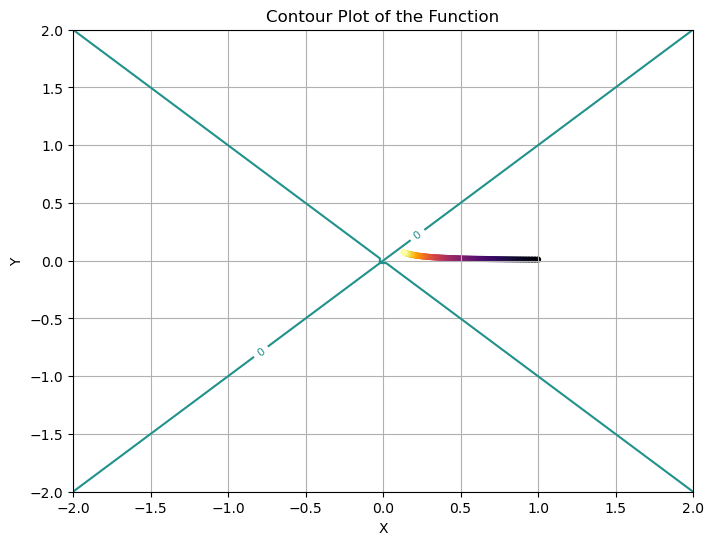

In [ ]:
plot_contour(fun2, x_range=(-2, 2), y_range=(-2, 2), num_points=100, levels=1, approx_points=points_5)

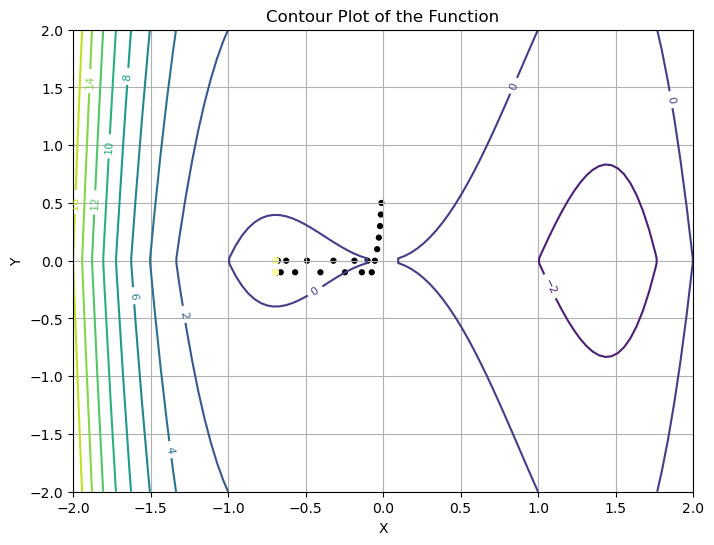

In [ ]:
plot_contour(fun3, x_range=(-2, 2), y_range=(-2, 2), num_points=100, levels=10, approx_points=points_6)

## Parte IV

Por  Último, apliquen el algoritmo a la función
k(x,y) = x4 −7x3 −14x2 −8x + y2

Usen a0 = (−0,1; 1) como punto inicial
 
 γ1 = 0,14,

 γ2 = 0,15, 
 
 γ3 = 0,16 
 
como distintas tasas. Para cada caso, expliquen el comportamiento del algoritmo. En espec ́ıfica:¿por qu ́e el algoritmo converge a este punto?

In [ ]:
def fun4(x,y):
    return x**4 -7*(x*x*x) -14*(x*x) -8*x + y**2

In [ ]:
def vector_gradiente_4(x, y):
    grad_x = 4*(x*x*x) - 21*x**2 - 28*x - 8
    grad_y = 2*y
    return [grad_x, grad_y]

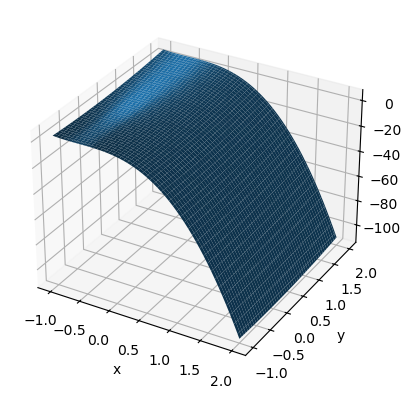

In [ ]:
cargar_grafico(fun4)

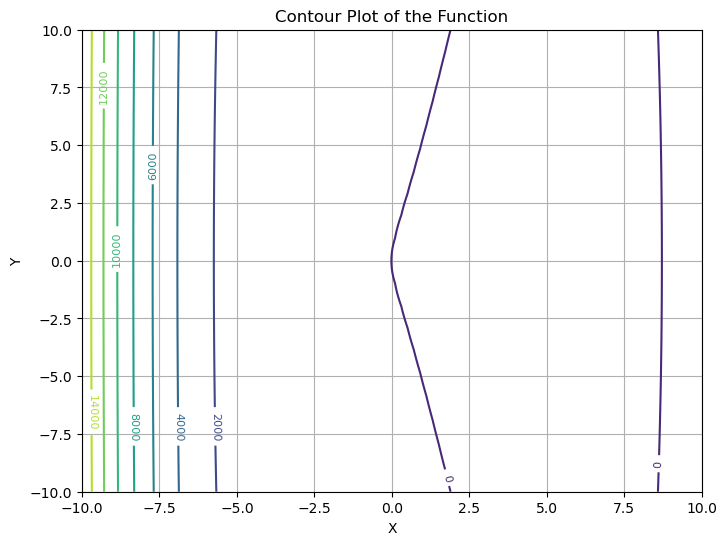

In [ ]:
plot_contour_fun4 = plot_contour(fun4, x_range=(-10, 10), y_range=(-10, 10), num_points=100, levels=10)


In [ ]:
valores_inicio = np.array([-0.1,1])

In [ ]:

points_1 = decent_gradient(0.14, valores_inicio , vector_gradiente_4, 9 )
points_1

/var/folders/rn/8kg7t05x7l3fy1mwbgcdkw240000gp/T/ipykernel_57725/1320543291.py:2: RuntimeWarning: overflow encountered in scalar multiply
  grad_x = 4*(x*x*x) - 21*x**2 - 28*x - 8
/var/folders/rn/8kg7t05x7l3fy1mwbgcdkw240000gp/T/ipykernel_57725/1320543291.py:2: RuntimeWarning: overflow encountered in scalar power
  grad_x = 4*(x*x*x) - 21*x**2 - 28*x - 8


array([[-1.00000000e-001,  1.00000000e+000],
       [ 6.57960000e-001,  7.20000000e-001],
       [ 5.47041312e+000,  5.18400000e-001],
       [ 2.43406977e+001,  3.73248000e-001],
       [-6.21309185e+003,  2.68738560e-001],
       [ 1.34424388e+011,  1.93491763e-001],
       [-1.36026096e+033,  1.39314070e-001],
       [ 1.40946642e+099,  1.00306130e-001],
       [-1.56802226e+297,  7.22204136e-002],
       [             inf,  5.19986978e-002]])

In [ ]:
points_2=decent_gradient(0.15, valores_inicio , vector_gradiente_4,9 )

points_2

/var/folders/rn/8kg7t05x7l3fy1mwbgcdkw240000gp/T/ipykernel_57725/1320543291.py:2: RuntimeWarning: overflow encountered in scalar multiply
  grad_x = 4*(x*x*x) - 21*x**2 - 28*x - 8
/var/folders/rn/8kg7t05x7l3fy1mwbgcdkw240000gp/T/ipykernel_57725/1320543291.py:2: RuntimeWarning: overflow encountered in scalar power
  grad_x = 4*(x*x*x) - 21*x**2 - 28*x - 8


array([[-1.00000000e-001,  1.00000000e+000],
       [ 7.12100000e-001,  7.00000000e-001],
       [ 6.28358445e+000,  4.90000000e-001],
       [ 9.38896132e+000,  3.43000000e-001],
       [-1.68893509e+002,  2.40100000e-001],
       [ 2.97959094e+006,  1.68070000e-001],
       [-1.58715895e+019,  1.17649000e-001],
       [ 2.39890205e+057,  8.23543000e-002],
       [-8.28302164e+171,  5.76480100e-002],
       [             inf,  4.03536070e-002]])

In [ ]:
points_3=decent_gradient(0.16, valores_inicio , vector_gradiente_4, 10 )

points_3

/var/folders/rn/8kg7t05x7l3fy1mwbgcdkw240000gp/T/ipykernel_57725/1320543291.py:2: RuntimeWarning: overflow encountered in scalar multiply
  grad_x = 4*(x*x*x) - 21*x**2 - 28*x - 8
/var/folders/rn/8kg7t05x7l3fy1mwbgcdkw240000gp/T/ipykernel_57725/1320543291.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  grad_x = 4*(x*x*x) - 21*x**2 - 28*x - 8


array([[-1.00000000e-001,  1.00000000e+000],
       [ 7.66240000e-001,  6.80000000e-001],
       [ 7.16380924e+000,  4.62400000e-001],
       [-2.23212063e+001,  3.14432000e-001],
       [ 8.67062344e+003,  2.13813760e-001],
       [-4.16934526e+011,  1.45393357e-001],
       [ 4.63856400e+034,  9.88674826e-002],
       [-6.38749588e+103,  6.72298882e-002],
       [             inf,  4.57163240e-002],
       [             nan,  3.10871003e-002],
       [             nan,  2.11392282e-002]])

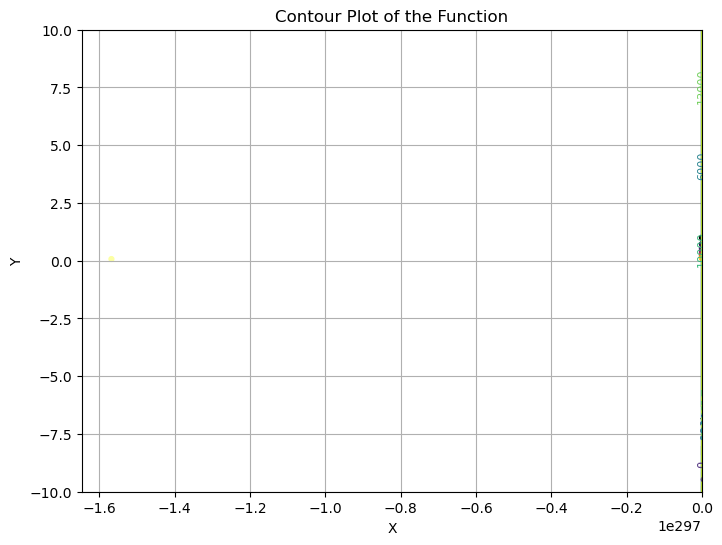

In [ ]:
plot_contour(fun4, x_range=(-10, 10), y_range=(-10, 10), num_points=100, levels=10, approx_points=
points_1)

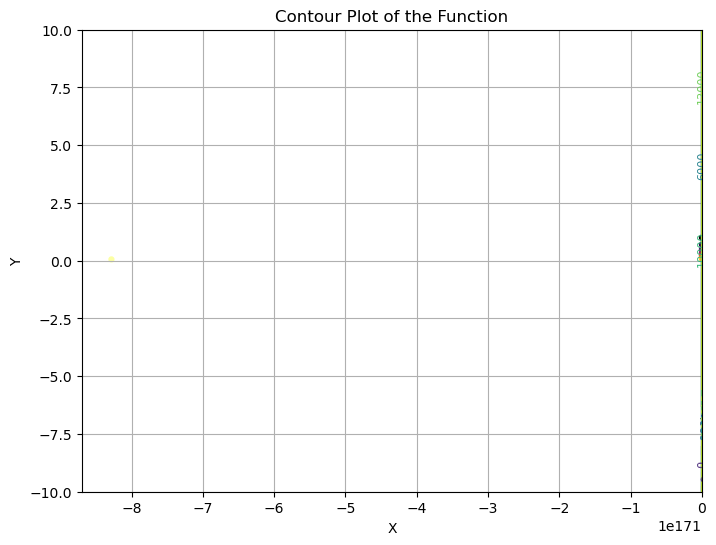

In [ ]:
plot_contour(fun4, x_range=(-10, 10), y_range=(-10, 10), num_points=100, levels=10, approx_points=
points_2)

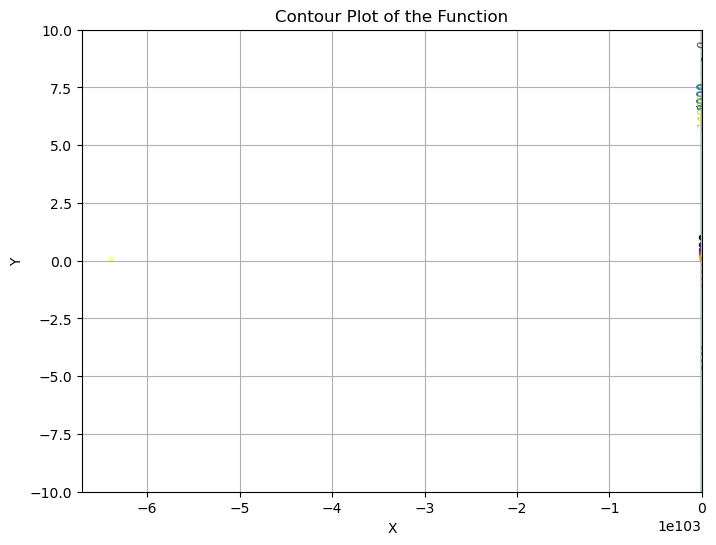

In [ ]:
plot_contour(fun4, x_range=(-10, 10), y_range=(10, -10), num_points=100, levels=10, approx_points=
points_3)

### Concluciones


Las razones por las que el algoritmo puede converger a un punto determinado varían desde la configuración de la tasa de aprendizaje hasta las propiedades inherentes de la función que se desea minimizar.

Entre las razones que pueden llevar a resultados indeseados se encuentra la configuración del propio algoritmo. Es importante tener en cuenta el número de iteraciones. Podemos tener un algoritmo que, además de calcular un número fijo de iteraciones, se detenga cuando detecta que la sucesión ha convergido. En este caso, solo utilicé un número fijo de iteraciones, ya que me basé en el código de ejemplo.

Para el ejemplo dado, podemos concluir dos cosas: primero, el hecho de no alcanzar un mínimo local o global se relaciona tanto con las características de la función como con la tasa de aprendizaje elegida. Si la tasa de aprendizaje es muy alta, el algoritmo puede dar "saltos" muy grandes, lo que puede impedir que encuentre el mínimo local. en consecuencia el algoritmo alcanzó el valor "inf" debido a una tasa de aprendizaje demasiado alta, por el mismo motivo las graficas no funcionan.